In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [3]:
df = pd.read_csv(r"C:\Users\saman\OneDrive\Desktop\Global EV Sales 2010-2024 Kaggle.csv")

## Section 1: Data Preparation & Setup

In [6]:
df.head(n = 10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [8]:
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [10]:
df.shape

(12654, 8)

In [12]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [14]:
df["powertrain"].unique()

array(['EV', 'BEV', 'PHEV', 'Publicly available fast',
       'Publicly available slow', 'FCEV'], dtype=object)

In [16]:
df["region"].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [18]:
df["mode"].unique()

array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object)

In [20]:
df['mode'].value_counts(dropna = False)

mode
Cars      4706
Buses     2696
Vans      2568
Trucks    1766
EV         918
Name: count, dtype: int64

In [22]:
df["year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010, 2025, 2030, 2035], dtype=int64)

In [24]:
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [26]:
vehicles=df.loc[df['unit']=='Vehicles']
display(vehicles.head())
display(vehicles.shape)
display(vehicles.describe())

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


(6842, 8)

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


mode
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

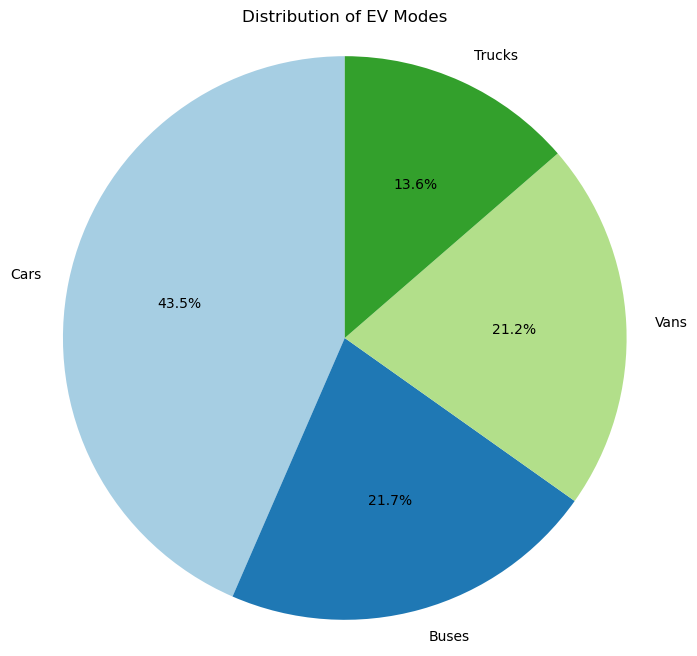

In [28]:
mode = vehicles['mode'].value_counts()
display(mode)
mode_counts = vehicles['mode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of EV Modes')
plt.axis('equal')
plt.show()

## Section 2: Labeled Baseline Review

In [31]:
df_dummies = pd.get_dummies(df,columns=['region','category','parameter','mode','powertrain','unit'])

In [33]:
print(df_dummies.dtypes.to_string())

year                                         int64
value                                      float64
region_Australia                              bool
region_Austria                                bool
region_Belgium                                bool
region_Brazil                                 bool
region_Bulgaria                               bool
region_Canada                                 bool
region_Chile                                  bool
region_China                                  bool
region_Colombia                               bool
region_Costa Rica                             bool
region_Croatia                                bool
region_Cyprus                                 bool
region_Czech Republic                         bool
region_Denmark                                bool
region_EU27                                   bool
region_Estonia                                bool
region_Europe                                 bool
region_Finland                 

In [35]:
df_dummies.head(10)

,year,value,region_Australia,region_Austria,region_Belgium,region_Brazil,region_Bulgaria,region_Canada,region_Chile,region_China,...,powertrain_FCEV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow,unit_GWh,unit_Milion barrels per day,"unit_Oil displacement, million lge",unit_Vehicles,unit_charging points,unit_percent
0,2011,0.00039,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2011,0.00650,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2011,49.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2011,49.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2012,220.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,2012,170.00000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,2012,0.03000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,2012,0.00240,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,2012,80.00000,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
9,2012,80.00000,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [37]:
float_cols = df_dummies.select_dtypes(include=["float64"]).columns
df_dummies[float_cols] = df_dummies[float_cols].astype("int64")

In [39]:
bool_cols = df_dummies.select_dtypes(include=["bool"]).columns
df_dummies[bool_cols] = df_dummies[bool_cols].astype("int64")

In [41]:
y = df_dummies["region_USA"]

X = df_dummies.copy()
X = X.drop("region_USA", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [43]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [45]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.958119
Precision: 0.587678
Recall: 0.867133
F1 Score: 0.700565


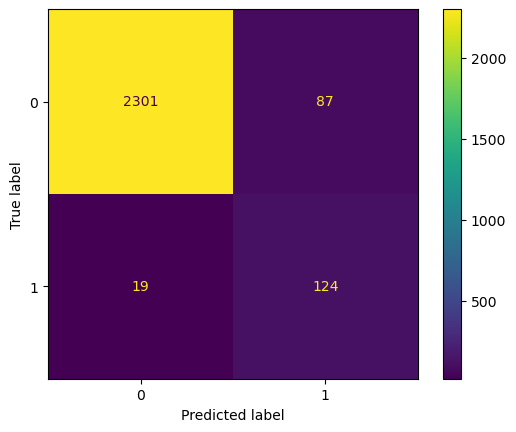

In [47]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

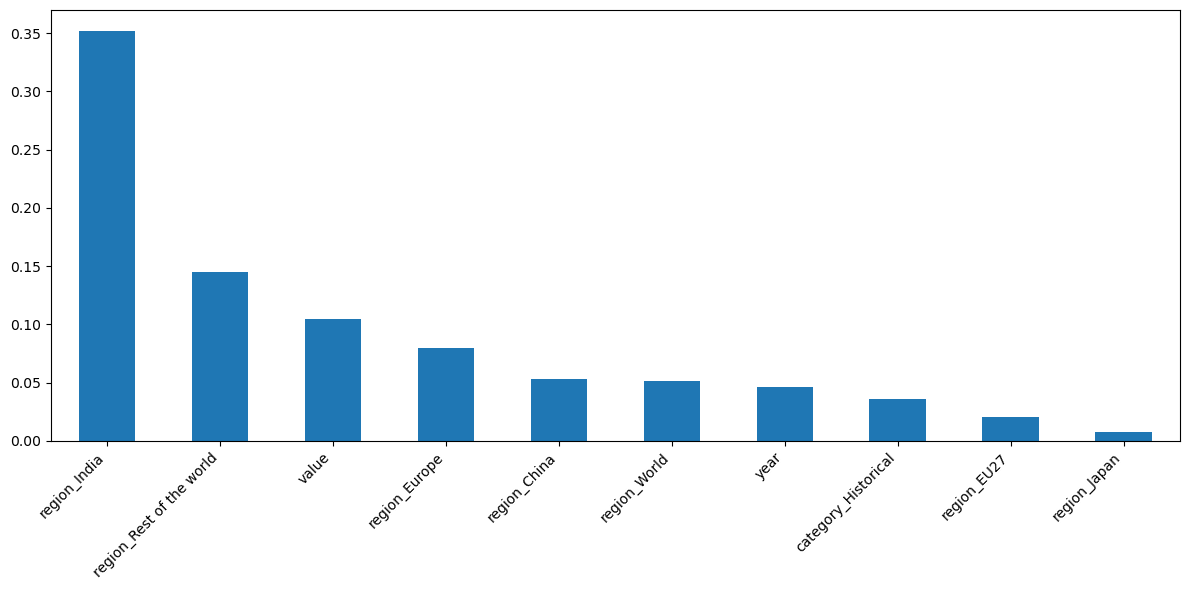

In [49]:
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
top_n = 10
forest_importances.head(top_n).plot.bar(figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

While traditional labeled models capture some key factors, such as vehicle value and year, they fall short of fully representing the nuances of automotive advertising and EV adoption. Single decision trees are simple and interpretable but generate many false positives, misallocating budget and reducing targeting efficiency. Even when overall accuracy seems high, reliance on labels alone overlooks patterns in historical versus projected data, regional variations, and infrastructure metrics. Methods like Random Forest and Gradient Boosting improve predictive performance, but each highlights different drivers, revealing that no single labeled model captures the complete business reality.

This natually encourages clustering as unsupervised segmentation can uncover latent patterns beyond pre-defined labels, such as regions with high EV infrastructure adoption versus rapid market growth. Clustering should help improve targeting and segmentation in ways traditional labeling cannot, ultimately reducing waste and enhancing strategic decision-making across marketing and operational planning.

## Section 3: Optimal K Selection

### 3.1 Elbow Method

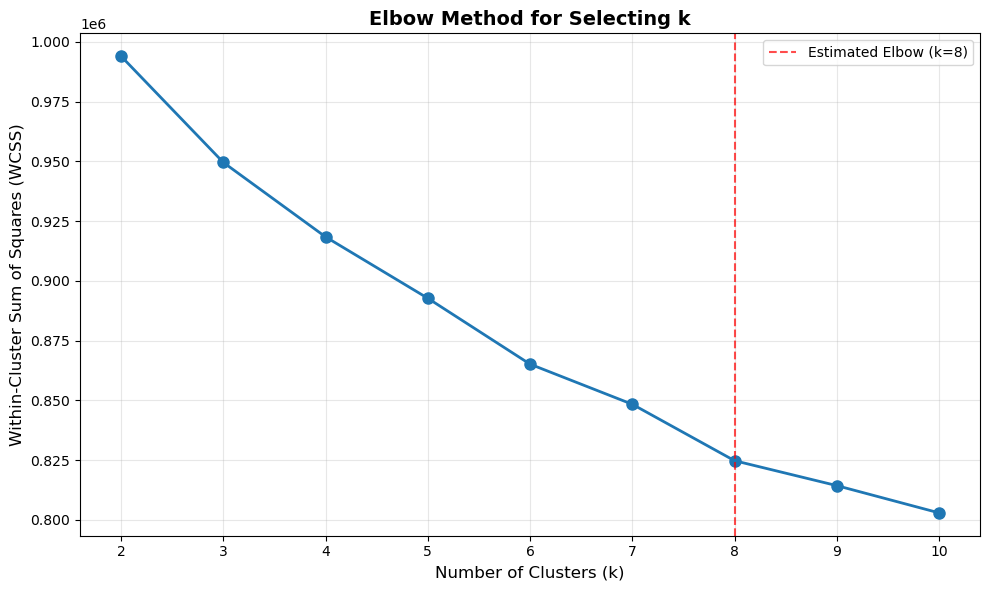

Estimated elbow occurs around k = 8.


In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

k_range = range(2, 11)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

diffs = np.diff(wcss)
diffs2 = np.diff(diffs)
elbow_k = k_range[np.argmin(diffs2) + 2]   

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Selecting k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7,
            label=f'Estimated Elbow (k={elbow_k})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Estimated elbow occurs around k = {elbow_k}.")

The Elbow method involves plotting WCSS against K and identifying a bend. This bend indicates the point where adding more clusters does not significantly improve the model.The point where the rate of decrease in WCSS slows down significantly in the above is around k = 8.

### 3.2 Silhouette Score Analysis

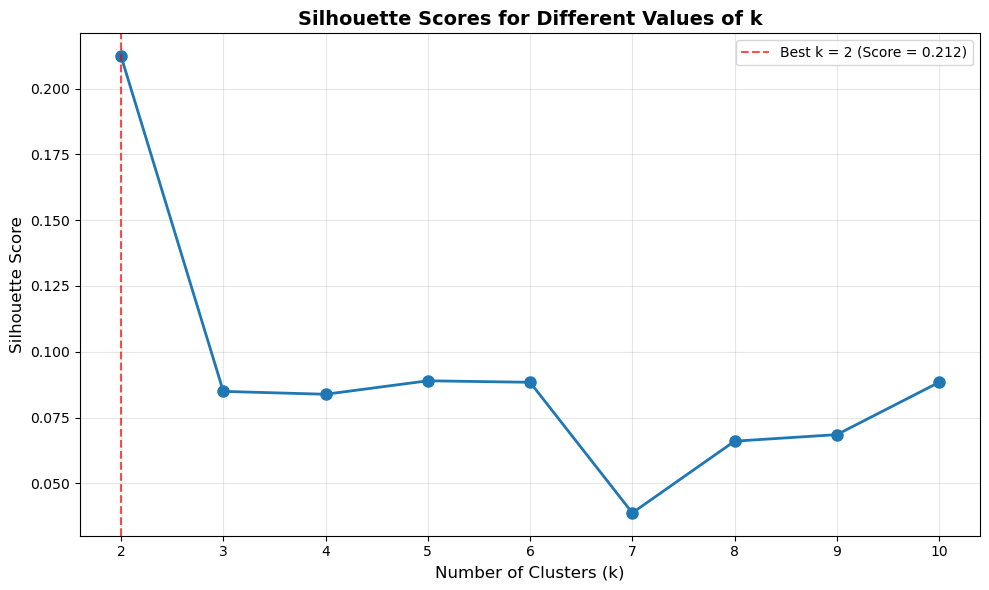

Optimal number of clusters based on Silhouette Score: k = 2
Best Silhouette Score: 0.212


In [57]:
from sklearn.metrics import silhouette_score
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Scores for Different Values of k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.axvline(
    x=best_k,
    color='red',
    linestyle='--',
    alpha=0.7,
    label=f'Best k = {best_k} (Score = {best_score:.3f})'
)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Optimal number of clusters based on Silhouette Score: k = {best_k}")
print(f"Best Silhouette Score: {best_score:.3f}")

The Silhouette score measures cluster separation and cohesion. Higher scores indicate better-defined clusters and more effective grouping. The silhouette score measures how similar a point is to its own cluster compared to other clusters. Scores range from -1 to 1, with values near 1 findicating well-separated clusters. The above indicates a best silhouette score of 0.212.

### 3.3 K Selection Decision

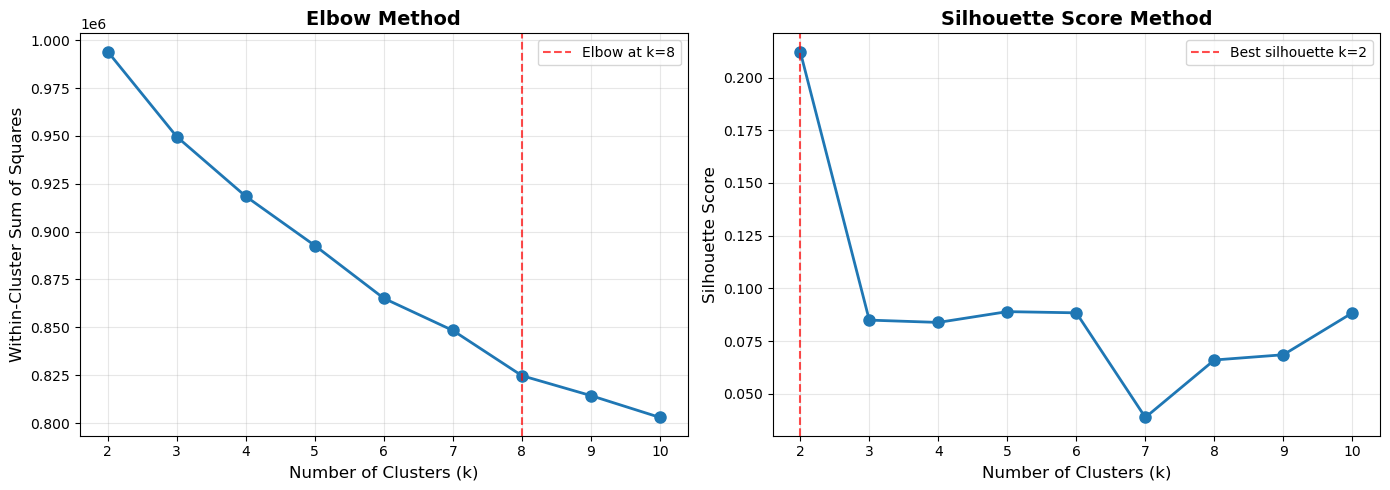

Cluster Selection Summary
-------------------------
Elbow Method suggests: k = 8
Silhouette Method suggests: k = 2
The methods disagree. Elbow suggests k=8, while Silhouette suggests k=2.
Decision will depend on business context and cluster interpretability.


In [61]:
k_range_silhouette = range(2, 11)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares', fontsize=12)
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

ax1.axvline(
    x=elbow_k,
    color='red',
    linestyle='--',
    alpha=0.7,
    label=f'Elbow at k={elbow_k}'
)
ax1.legend()

ax2.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score Method', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range_silhouette)

ax2.axvline(
    x=best_k,
    color='red',
    linestyle='--',
    alpha=0.7,
    label=f'Best silhouette k={best_k}'
)
ax2.legend()

plt.tight_layout()
plt.show()

print("Cluster Selection Summary")
print("-------------------------")
print(f"Elbow Method suggests: k = {elbow_k}")
print(f"Silhouette Method suggests: k = {best_k}")

if elbow_k == best_k:
    print(f"Both methods agree on k = {elbow_k}, making this the recommended number of clusters.")
else:
    print(f"The methods disagree. Elbow suggests k={elbow_k}, while Silhouette suggests k={best_k}.")
    print("Decision will depend on business context and cluster interpretability.")

Two methods were used to determine the optimal number of clusters: the Elbow Method and the Silhouette Score. However, the two approaches produced different recommendations:
Elbow Method suggests: k = 8
Silhouette Method suggests: k = 2

The Elbow Method looks for the point where adding additional clusters no longer produces improvements in within-cluster compactness (WCSS). In the above, the curve continues to decline gradually, and the analysis identified an elbow at k = 8, indicating that additional clusters provide diminishing returns after this point.

The Silhouette Score, on the other hand, measures how well separated and cohesive the clusters are. It peaked at k = 2, which indicates that the strongest and cleanest separation in the data occurs when the dataset is split into two groups.

From a business perspective, choosing the Elbow would provide too granular results that would be difficult to act on, while the Silhouette would be easier to integrate into existing workflows and more effective for business decisions. 

## Section 4: K-Means Clustering

### 4.1 Build Final Model

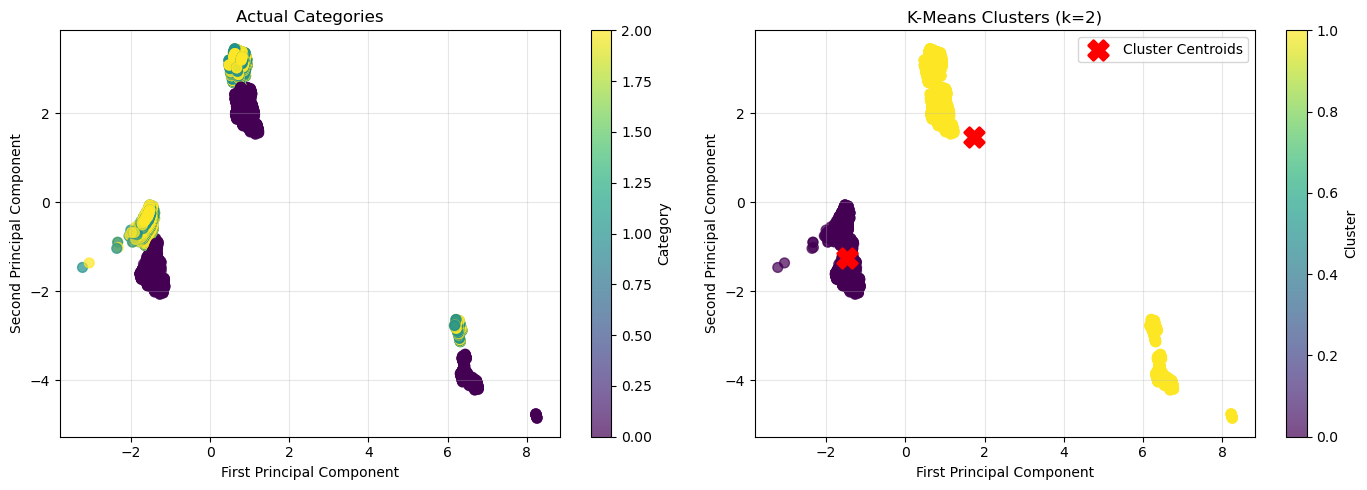

Final Silhouette Score: 0.212
The silhouette score suggests that the k=2 clustering structure is weak.


In [66]:
final_k = 2
final_kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(df_scaled)

final_kmeans_2d = KMeans(n_clusters=final_k, random_state=42, n_init=10)
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
df_2d = pca_2d.fit_transform(df_scaled)
final_labels_2d = final_kmeans_2d.fit_predict(df_2d)

final_silhouette = silhouette_score(df_scaled, final_labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

scatter1 = axes[0].scatter(
    df_2d[:, 0], df_2d[:, 1],
    c=df["category"].astype('category').cat.codes,
    cmap='viridis', alpha=0.7, s=50
)
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].set_title('Actual Categories')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Category')

scatter2 = axes[1].scatter(
    df_2d[:, 0], df_2d[:, 1],
    c=final_labels_2d,
    cmap='viridis', alpha=0.7, s=50
)
axes[1].scatter(
    final_kmeans_2d.cluster_centers_[:, 0],
    final_kmeans_2d.cluster_centers_[:, 1],
    s=200, c='red', marker='X',
    label='Cluster Centroids',
    linewidths=2
)
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].set_title(f'K-Means Clusters (k={final_k})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

print(f"Final Silhouette Score: {final_silhouette:.3f}")
print(f'The silhouette score suggests that the k={final_k} clustering structure is {"strong" if final_silhouette > 0.5 else "moderate" if final_silhouette > 0.3 else "weak"}.')

### 4.2 Cluster Characterization

In [69]:
df_clusters = df.copy()
df_clusters['cluster'] = final_labels

feature_cols = df_scaled_df.columns if 'df_scaled_df' in globals() else df.select_dtypes(include=np.number).columns

cluster_sizes = (
    df_clusters['cluster']
    .value_counts()
    .rename_axis('cluster')
    .reset_index(name='count')
)
cluster_sizes['percentage'] = cluster_sizes['count'] / len(df_clusters) * 100

print("\n=== CLUSTER SIZE SUMMARY ===")
display(cluster_sizes)

cluster_stats_mean = df_clusters.groupby('cluster')[feature_cols].mean()
cluster_stats_median = df_clusters.groupby('cluster')[feature_cols].median()

print("\n=== CLUSTER FEATURE MEANS ===")
display(cluster_stats_mean)

print("\n=== CLUSTER FEATURE MEDIANS ===")
display(cluster_stats_median)

overall_mean = df_clusters[feature_cols].mean()

distinguishing = cluster_stats_mean.copy()

for col in feature_cols:
    distinguishing[col] = cluster_stats_mean[col] - overall_mean[col]

print("\n=== DISTINGUISHING FACTORS (Cluster Mean – Overall Mean) ===")
display(distinguishing)

for c in sorted(df_clusters['cluster'].unique()):
    print(f"\n\n==========================")
    print(f"   CLUSTER {c} PROFILE")
    print(f"==========================")
    
    size = cluster_sizes.loc[cluster_sizes['cluster'] == c, 'count'].values[0]
    pct = cluster_sizes.loc[cluster_sizes['cluster'] == c, 'percentage'].values[0]
    print(f"Size: {size} entities ({pct:.1f}%)")
    
    print("\nKey Characteristics (Mean):")
    print(cluster_stats_mean.loc[c].round(3))
    
    print("\nDistinguishing Factors (High positive = higher than average):")
    print(distinguishing.loc[c].round(3))


=== CLUSTER SIZE SUMMARY ===


,cluster,count,percentage
0,1,11736,92.745377
1,0,918,7.254623



=== CLUSTER FEATURE MEANS ===


,year,value
cluster,,
0,2019.245098,274721.463725
1,2019.867246,439314.799569



=== CLUSTER FEATURE MEDIANS ===


,year,value
cluster,,
0,2019.0,2800.0
1,2020.0,85.0



=== DISTINGUISHING FACTORS (Cluster Mean – Overall Mean) ===


,year,value
cluster,,
0,-0.577014,-152652.709772
1,0.045134,11940.626071




   CLUSTER 0 PROFILE
Size: 918 entities (7.3%)

Key Characteristics (Mean):
year       2019.245
value    274721.464
Name: 0, dtype: float64

Distinguishing Factors (High positive = higher than average):
year         -0.577
value   -152652.710
Name: 0, dtype: float64


   CLUSTER 1 PROFILE
Size: 11736 entities (92.7%)

Key Characteristics (Mean):
year       2019.867
value    439314.800
Name: 1, dtype: float64

Distinguishing Factors (High positive = higher than average):
year         0.045
value    11940.626
Name: 1, dtype: float64


### 4.3 Representative Examples

In [98]:
features_used_for_clustering = X.columns.tolist()

centroids = pd.DataFrame(
    final_kmeans.cluster_centers_,
    columns=features_used_for_clustering
)

df_rep = df.copy()
df_rep['cluster'] = final_kmeans.labels_

print("\n=========== CENTROIDS ===========")
print(centroids)

print("\n=========== REPRESENTATIVE EXAMPLES BY CLUSTER ===========")
for c in sorted(df_rep['cluster'].unique()):
    print(f"\nCluster {c} centroid:")
    print(centroids.iloc[c])
    print("\nSample rows from this cluster:")
    print(df_rep[df_rep['cluster'] == c].head(3))


=========== CENTROIDS ===========
       year     value  region_Australia  region_Austria  region_Belgium  \
0 -0.105366 -0.022252          0.065722        0.200990       -0.003448   
1  0.008242  0.001741         -0.005141       -0.015722        0.000270   

   region_Brazil  region_Bulgaria  region_Canada  region_Chile  region_China  \
0      -0.011642        -0.044492       0.052618      0.224621     -0.131585   
1       0.000911         0.003480      -0.004116     -0.017570      0.010293   

   ...  powertrain_FCEV  powertrain_PHEV  powertrain_Publicly available fast  \
0  ...        -0.368379        -0.449375                            2.469000   
1  ...         0.028815         0.035150                           -0.193127   

   powertrain_Publicly available slow  unit_GWh  unit_Milion barrels per day  \
0                            2.491427 -0.213368                    -0.220359   
1                           -0.194882  0.016690                     0.017237   

   unit_Oil disp

## Section 5: PCA Visualization

### 5.1 Apply PCA

In [102]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components, random_state=42)

df_pca = pca.fit_transform(df_scaled)

pca_cols = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(df_pca, columns=pca_cols)

explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.3f} ({var*100:.1f}%) of variance explained)")

print(f"\nTotal variance explained by {n_components} components: {explained_variance.sum()*100:.1f}%")

Principal Component 1: 0.054 (5.4%) of variance explained)
Principal Component 2: 0.053 (5.3%) of variance explained)

Total variance explained by 2 components: 10.7%


PCA transforms high-dimensional data into fewer principal components capturing maximum variance. It simplifies data complexity and enhances analysis and interpretation. PCA extracts features, reduces dimensions, and compresses data. It preserves essential information while reducing redundancy. PCA enables visualization of intricate datasets in 2D or 3D. This makes it easier to interpret and analyze patterns.

Principal Component 1 explains 5.4% and Principal Component 2 explains 5.3%, together they capture 10.7% of the variance, meaning 10.7% of the structure in the data is preserved in these two dimensions.

### 5.2 Visualize Clusters

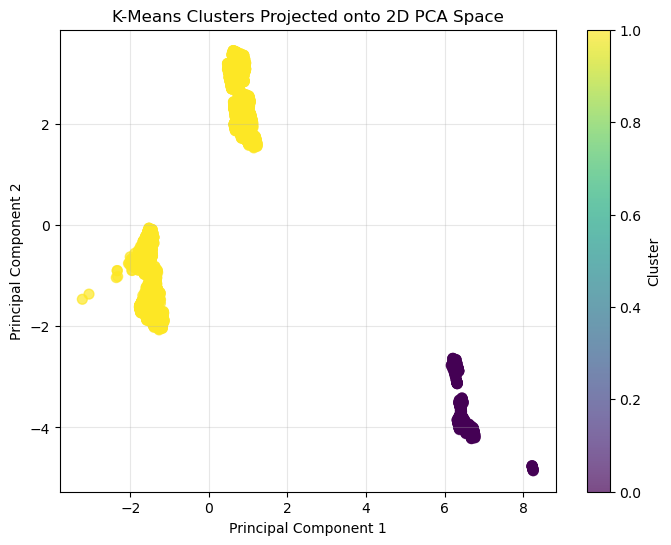

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=final_labels, cmap='viridis', alpha=0.7, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Projected onto 2D PCA Space')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

### 5.3 PCA Interpretation 

## Section 6: Compare Clusters to Original Labels

### 6.1 Alignment Analysis

In [126]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X.columns
)

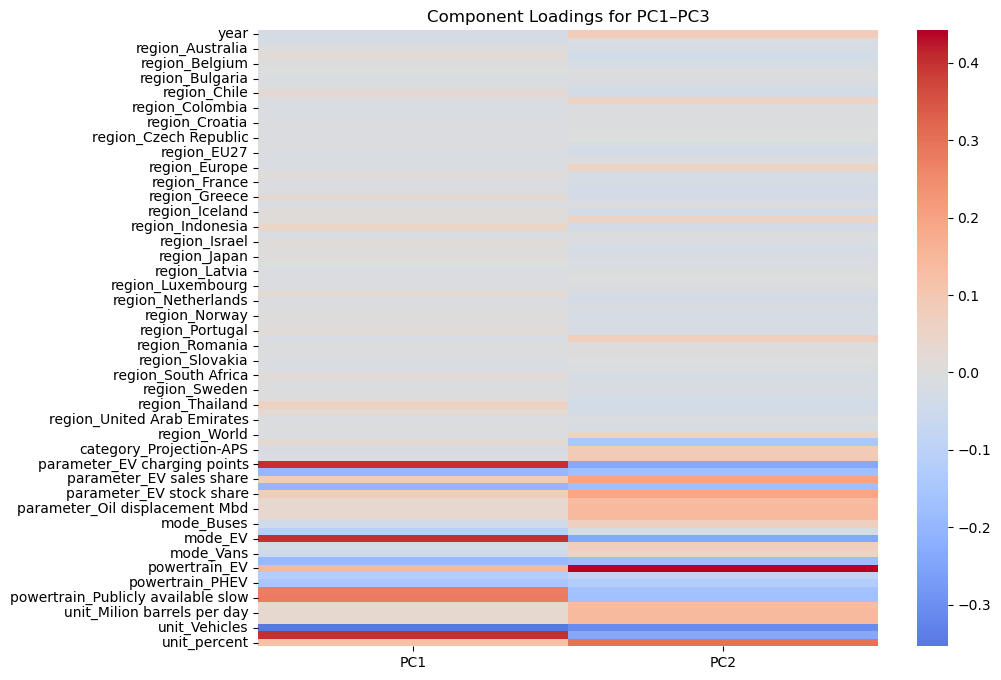

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, cmap="coolwarm", center=0)
plt.title("Component Loadings for PC1–PC3")
plt.show()

In [136]:
from sklearn.metrics import adjusted_rand_score
X = df[['value']]
true_labels = df['category']
predicted_clusters = df_clusters['cluster']

ari = adjusted_rand_score(true_labels, predicted_clusters)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

Adjusted Rand Index (ARI): -0.029


Clustering is worse than random and contradict the original labeling. Here, ARI = -0.029 indicates that the clusters do not align with the original labels at all. In fact, they slightly contradict the label structure.

### 6.2 Interpretation

Most clusters contain multiple original labels, consistent with ARI = -0.029. This indicates that the original labels do not fully explain the variation in the data. Operationally, this suggests that decisions based solely on original labels could overlook important similarities or differences, like EV type or sales performance.

Even though the clusters contradict the original labels, they still uncover feature-driven patterns that could inform operational strategies like stocking popular EV charging types (BEV vs PHEV) informing inventory management or marketing targeting – which the original labeled approach might miss.  Clusters appear to group vehicles based on feature variance rather than the original categories. For example, EV charging type and powertrain may cluster together, regardless of their nominal category (e.g., car, SUV, truck). Some clusters may capture similarities in operational characteristics like high specific powertrains, or regional trends that were not represented in the original labeling. 

Clusters may group vehicles by regional sales patterns rather than category, so we would adjust stock levels in a region according to cluster characteristics instead of traditional category segmentation. Even though clusters do not match the original labels, they can inform actionable decisions. Original labeling could classify vehicles by category like Sedan, SUV, etc. but clusters reveal which vehicles are functionally similar, allowing marketing for clusters with high EV adoption potential rather than relying solely on category labels. 

## Section 7: Segment Personas & Action Plans

### 7.1 Persona

Persona: EV Pioneers

Cluster 0 represents regions and vehicles heavily focused on public EV charging infrastructure, especially fast and slow charging points. The typical member is often is often located in regions where the presence of public charging dominates vehicle considerations. They are characterized by high engagement with EV charging availability rather than vehicle numbers or sales volumes. They care deeply about access to charging for BEVs, PHEVs, and FCEVs, often planning trips around infrastructure. These members are early adopters of EV technology, prioritizing fast-charging convenience and planning trips efficiently. Operationally, they may be fleet operators, urban planners, or municipalities managing EV infrastructure growth. They are less concerned with the total number of vehicles or sales volume, focusing instead on system capacity and accessibility.

Persona: EV Opportunists 

Cluster 1 members are forward-thinking and evaluate both the availability of charging infrastructure and market growth trends when making decisions. They tend to operate in regions with moderate EV stock and sales but where charging infrastructure can create a future opportunity. Their behavior is data-driven: they analyze vehicle stock, sales trends, and availability of charging points before making a decision. They are strategic thinkers who are cautious towards EV adoption and ensuring feasibility in their location and daily life. Unlike purely infrastructure-focused persona, they value strategic EV adoption and support systems.

### 7.2 Action Plan

Persona: EV Pioneers 

- Integrated planning: Coordinate infrastructure expansion with EV sales initiatives, targeting regions where both are poised for growth.

 - Predictive analytics: Use data to identify regions where additional chargers will accelerate adoption or where sales growth can be supported by infrastructure.

- Strategic partnerships: Collaborate with EV manufacturers, local authorities, and utilities to create incentive programs tied to infrastructure deployment.

- Marketing campaigns: Highlight both vehicle availability and charging convenience to appeal to forward-looking EV adopters.


Persona: EV Opportunists

- Market-focused initiatives: Launch promotional campaigns to boost EV adoption in regions with low penetration.

- Incentive programs: Offer financial incentives, rebates, or leasing options to increase EV sales and stock growth.

- Dealer training: Equip dealerships with sales knowledge and tools for EVs, emphasizing BEV and PHEV advantages.

- Data tracking & analytics: Monitor EV sales trends and market share to adjust production, inventory, and marketing strategies dynamically.

## Section 8: Reflection

When I looked at the clusters, the biggest surprise was how little they actually had to do with the original labels I started with, such as the vehicle's type, the mode of transport, or even what kind of engine it had. the Adjusted Rand Index (ARI) was negative (-0.029), which indicated the clusters didn't just fail to match the labels, they actually went slightly against them. Instead of putting all the cars or all the buses together, the clusters were driven by completely different patterns. They were revealing differences based on things like EV charging availability, sales growth, and current stock levels. 

This unexpected separation indicated an important point, those traditional, broad categories might just be too basic to capture the messy, real-world complexity of getting EVs adopted and building out the necessary infrastructure. Even though the results contradicted my initial assumptions, they still gave powerful insights that make total sense in the industry today.

The two personas created allowed me to see how marketing strategy could target the same overarching buyer (EV intender) in different ways, with one group focused on available new technology and infrastructure, and those who more opportunist and following sales trends. These personas align perfectly with the business realities of planning an EV rollout, managing large fleets, and deciding where to invest in charging networks.
This is the actionable part: these groupings offer a strategic lens that raw sales data or simple vehicle categories just can't provide. They practically point to the exact spots where a new charger, a specific marketing campaign, or an incentive program will make the biggest difference. Essentially, they give us a roadmap for prioritizing our limited resources.

Of course, it wasn't a perfect analysis as the clustering relied heavily on sparse data, and  a few regions had really small sample sizes, which could potentially skew the clusters a bit. Despite these limitations, this kind of clustering can be an incredible tool to guide market segmentation, infrastructure planning, and even predicting adoption trends. . It helps businesses anticipate the next big shift and allocate resources strategically, even when they don't have perfectly clean labels to start with.